In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris_path = "/content/drive/MyDrive/ML/Lab 8/iris.csv"
df = pd.read_csv(iris_path)

In [ ]:
y = df['variety']
X = df.drop(['variety'], axis = 1)

In [ ]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier(n_neighbors = 3)
y_pred = model.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
conf_mat = pd.DataFrame(np.array(confusion_matrix(y_test, y_pred)))

Test Accuracy:  0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [ ]:
ks, acc = [], []
for i in range(1, 100):
  model = KNeighborsClassifier(n_neighbors = i)
  y_pred = model.fit(X_train, y_train).predict(X_test)
  ks.append(i)
  acc.append(accuracy_score(y_test, y_pred))

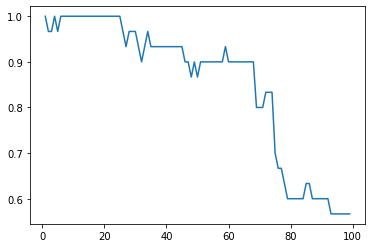

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ks, acc)

In [ ]:
print("Best K values are:", list(np.where(np.array(acc) == max(acc))[0] + 1))

Best K values are: [1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [ ]:
def macro_avg(conf_mat):
  precision, recall = 0, 0
  for i in range(len(conf_mat)):
    tp = conf_mat.iloc[i, i]
    row = sum(list(conf_mat.iloc[i, :]))
    col = sum(list(conf_mat.iloc[:, i]))
    precision += tp / row
    recall += tp / col
  return(precision / 3, recall / 3)
macro_precision, macro_recall = macro_avg(conf_mat)
print("Macro Precision:", macro_precision, "Macro Recall:", macro_recall)
def micro_avg(conf_mat):
  precision, recall = 0, 0
  tp, fp, fn = 0, 0, 0
  for i in range(len(conf_mat)):
    tp += conf_mat.iloc[i, i]
    fp += sum(list(conf_mat.iloc[i, :])) - conf_mat.iloc[i, i]
    fn += sum(list(conf_mat.iloc[:, i])) - conf_mat.iloc[i, i]
  return(tp / (tp + fp), tp / (tp + fn))
micro_precision, micro_recall = micro_avg(conf_mat)
print("Micro Precision:", micro_precision, "Micro Recall:", micro_recall)

Macro Precision: 0.9743589743589745 Macro Recall: 0.9523809523809524
Micro Precision: 0.9666666666666667 Micro Recall: 0.9666666666666667


In [ ]:
from sklearn.datasets import make_blobs
model = KNeighborsClassifier(n_neighbors = 3)
X, y = make_blobs(n_samples=[15, 35, 100], n_features=4, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Test Accuracy:  1.0


In [ ]:
X, y = make_blobs(n_samples=[15, 35, 100], n_features=4, random_state=0)
print(X.shape, y.shape)
X = np.append(X, np.array([10300, 100000, 100000, 10000]))
y = np.append(y, 1)
X = np.append(X, np.array([-1000000, 100000, 100000, 10000]))
y = np.append(y, 2)
X = np.append(X, np.array([1000000, -100000, 100000, 10000]))
y = np.append(y, 1)
X = np.append(X, np.array([1000000, 100500, -100000, 10000]))
y = np.append(y, 0)
X = np.append(X, np.array([-1000000, -100000, 100000, 10000]))
y = np.append(y, 2)
X = np.reshape(X, (155, 4))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

(150, 4) (150,)
Test Accuracy:  0.9354838709677419
